In [15]:
import os
import json
import re
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [52]:
ROOT = 'C:\\Users\\niti.mishra\\Documents\\Personal\\cyberbullying\\'
# RESULTS = Path(os.path.join(ROOT, 'results'))
RESULTS = Path(os.path.join(ROOT, 'results', '1g2g'))
PLOTS = Path(os.path.join(RESULTS))
files = [i for i in list(RESULTS.iterdir()) if '.json' in i.suffix ]
files = [files[0]]

In [54]:
full_df = pd.DataFrame()
for i in files:
    print(i)
    each_df = pd.read_json(i, lines=True)
    each_df['iter'] =  re.findall(r'\d+', i.stem)[0]
    each_df['iter'] = each_df['iter'].astype(int)
    full_df = full_df.append(each_df)

full_df.head()

C:\Users\niti.mishra\Documents\Personal\cyberbullying\results\1g2g\FORM_results2467_1g2g_ab.json


,model,name,size,accuracy,precision,recall,f1_valid,f1_train,time,iter
0,"Pipeline(memory=None,\n steps=[('norma...",LogisticRegression,"[[2261, 206], [2261, 206], [2261, 206], [2261,...","[0.6650485436893201, 0.6456310679611651, 0.669...","[0.6160684883730361, 0.611019022811587, 0.6418...","[0.6650485436893201, 0.6456310679611651, 0.669...","[0.5983206874983, 0.593103448275862, 0.6101509...","[0.8142919224197671, 0.8058837795834061, 0.810...","[3.284482955932617, 2.151976823806762, 2.50192...",2467
1,"Pipeline(memory=None,\n steps=[('norma...",SVC,"[[2261, 206], [2261, 206], [2261, 206], [2261,...","[0.7038834951456311, 0.7038834951456311, 0.718...","[0.6414169992256831, 0.7208524149722171, 0.701...","[0.7038834951456311, 0.7038834951456311, 0.718...","[0.6523511729951971, 0.6620785925444981, 0.673...","[0.96422139270186, 0.967071139720667, 0.968554...","[6.248534917831421, 6.201669454574585, 6.10797...",2467
2,"Pipeline(memory=None,\n steps=[('norma...",KNeighborsClassifier,"[[2261, 206], [2261, 206], [2261, 206], [2261,...","[0.6165048543689321, 0.611650485436893, 0.5922...","[0.548276326558102, 0.5352251296932441, 0.5230...","[0.6165048543689321, 0.611650485436893, 0.5922...","[0.579599412463435, 0.569182520131657, 0.54637...","[0.6815587979951291, 0.6711962942163171, 0.674...","[1.405919551849365, 1.452782154083252, 1.37467...",2467


In [55]:
df = full_df.copy()
df = full_df.drop(['model', 'size'], axis=1)
df.head()

,name,accuracy,precision,recall,f1_valid,f1_train,time,iter
0,LogisticRegression,"[0.6650485436893201, 0.6456310679611651, 0.669...","[0.6160684883730361, 0.611019022811587, 0.6418...","[0.6650485436893201, 0.6456310679611651, 0.669...","[0.5983206874983, 0.593103448275862, 0.6101509...","[0.8142919224197671, 0.8058837795834061, 0.810...","[3.284482955932617, 2.151976823806762, 2.50192...",2467
1,SVC,"[0.7038834951456311, 0.7038834951456311, 0.718...","[0.6414169992256831, 0.7208524149722171, 0.701...","[0.7038834951456311, 0.7038834951456311, 0.718...","[0.6523511729951971, 0.6620785925444981, 0.673...","[0.96422139270186, 0.967071139720667, 0.968554...","[6.248534917831421, 6.201669454574585, 6.10797...",2467
2,KNeighborsClassifier,"[0.6165048543689321, 0.611650485436893, 0.5922...","[0.548276326558102, 0.5352251296932441, 0.5230...","[0.6165048543689321, 0.611650485436893, 0.5922...","[0.579599412463435, 0.569182520131657, 0.54637...","[0.6815587979951291, 0.6711962942163171, 0.674...","[1.405919551849365, 1.452782154083252, 1.37467...",2467


In [56]:
def avg_series(series):
    return [sum(i)/len(i) for i in series]

df.iloc[:,1:7] = df.iloc[:,1:7].apply(avg_series)
df
# full_df.to_excel("output.xlsx")

,name,accuracy,precision,recall,f1_valid,f1_train,time,iter
0,LogisticRegression,0.694773,0.645249,0.694773,0.639278,0.811589,2.274220,2467
1,SVC,0.715420,0.684789,0.715420,0.670746,0.967643,6.215994,2467
2,KNeighborsClassifier,0.618995,0.566299,0.618995,0.576899,0.671833,1.373378,2467


In [57]:
train = df.groupby(['name', 'iter'])['f1_train'].sum().unstack('name').reset_index()
train = train.loc[:,['NB' not in i for i in train.columns]]
train['set'] = 'train'

valid = df.groupby(['name', 'iter'])['f1_valid'].sum().unstack('name').reset_index()
valid = valid.loc[:,['NB' not in i for i in valid.columns]]
valid['set'] = 'valid'
valid

name,iter,KNeighborsClassifier,LogisticRegression,SVC,set
0,2467,0.576899,0.639278,0.670746,valid


In [58]:
plot_df = valid.append(train)
plot_df.reset_index(inplace=True)
plot_df.drop('index', axis=1, inplace=True)
plot_df.set_index('iter', inplace=True)
plot_df

name,KNeighborsClassifier,LogisticRegression,SVC,set
iter,,,,
2467,0.576899,0.639278,0.670746,valid
2467,0.671833,0.811589,0.967643,train


C:\Users\niti.mishra\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 2467.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
C:\Users\niti.mishra\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 2467.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


set
train    AxesSubplot(0.125,0.125;0.775x0.755)
valid    AxesSubplot(0.125,0.125;0.775x0.755)
Name: LogisticRegression, dtype: object

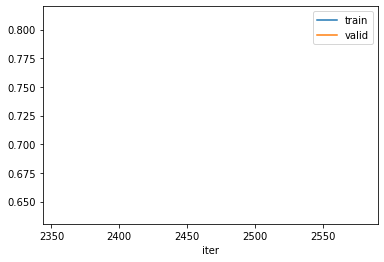

In [61]:
plot_df.groupby('set')['LogisticRegression'].plot(legend=True)

set
train    AxesSubplot(0.125,0.125;0.775x0.755)
valid    AxesSubplot(0.125,0.125;0.775x0.755)
Name: SVC, dtype: object

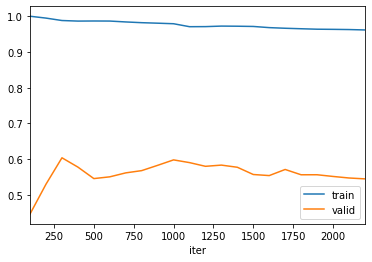

In [23]:
plot_df.groupby('set')['SVC'].plot(legend=True)

set
train    AxesSubplot(0.125,0.125;0.775x0.755)
valid    AxesSubplot(0.125,0.125;0.775x0.755)
Name: KNeighborsClassifier, dtype: object

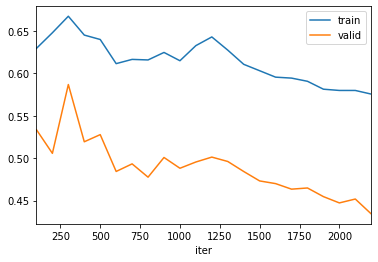

In [24]:
plot_df.groupby('set')['KNeighborsClassifier'].plot(legend=True)

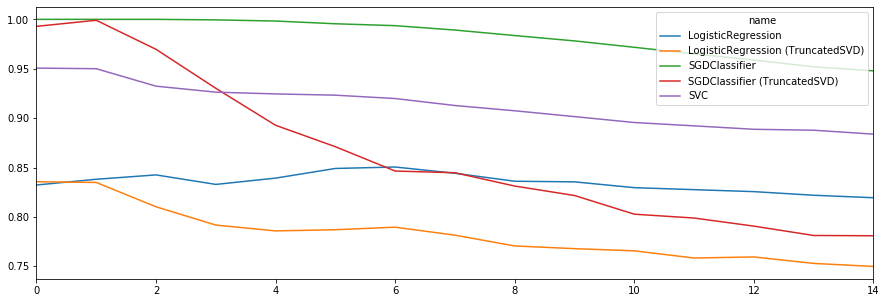

In [33]:
plt.rcParams["figure.figsize"] = (15,5)
train.iloc[:,1:].plot()

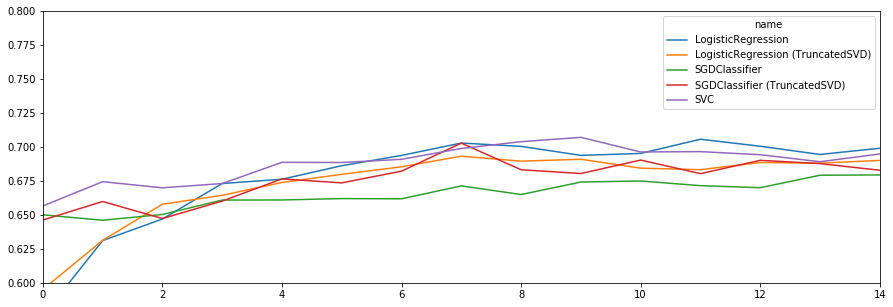

In [34]:
valid.iloc[:,1:].plot(ylim=(0.6, .8))